# Classificação - Spambase

[Dataset (OpenML)](https://www.openml.org/search?type=data&sort=runs&status=active&qualities.NumberOfClasses=%3D_2&id=44)

O dataset é de **classificação binária**, portanto conta com somente **um valor de intercept** e o número de valores de **coef** é igual ao número de features. Essa informação foi retirada da [documentação do scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) da classe LogisticRegression.



## Carregamento do dataset

In [1]:
from sklearn.datasets import fetch_openml

dataset = fetch_openml(data_id=44)

## Importação de dependências

In [2]:
import numpy
from typing import Tuple, List
from pandas import DataFrame, Series
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from matplotlib import pyplot

## Metadados do dataset

In [3]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
features: DataFrame = dataset['data']
target: Series = dataset['target']

features.shape, target.shape

((4601, 57), (4601,))

In [5]:
X, y = dataset.data, dataset.target

In [6]:
target

0       1
1       1
2       1
3       1
4       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: class, Length: 4601, dtype: category
Categories (2, object): ['0', '1']

## Treinamento do modelo

In [7]:
# Seleciona apenas features numéricas
features = features.select_dtypes(include=['number'])

model = LogisticRegression(max_iter=1500)
model.fit(features, target)
predicted = model.predict(features)

## Visualização dos resultados

### Exibição de métricas

In [8]:
accuracy = accuracy_score(target, predicted)
print('Accuracy:', accuracy)

intercept_value = model.intercept_
print('Intercept:', intercept_value)

coefficient = model.coef_
print('Coeficientes:', coefficient)

Accuracy: 0.9313192784177353
Intercept: [-1.47574469]
Coeficientes: [[-3.25579436e-01 -1.54257764e-01  1.29800751e-01  8.64860131e-01
   5.58080709e-01  7.60853619e-01  2.12810867e+00  5.81661808e-01
   6.59437189e-01  1.22871784e-01 -2.16837668e-01 -1.51307844e-01
  -6.70514822e-02  1.51841218e-01  9.65811763e-01  1.03149537e+00
   9.26661691e-01  1.25693178e-01  7.75343717e-02  9.74094429e-01
   2.51696846e-01  2.71105909e-01  2.16082664e+00  5.46432974e-01
  -1.76475603e+00 -1.01228828e+00 -3.79605447e+00  4.08828180e-01
  -1.35786476e+00 -3.45158731e-01 -4.50573855e-01 -5.01123565e-02
  -8.36529122e-01 -4.78595518e-02 -1.20585627e+00  7.92425562e-01
  -9.83737668e-03 -4.93165890e-01 -7.63610970e-01 -3.35523003e-01
  -1.50243526e+00 -1.89685392e+00 -8.37339939e-01 -1.40899780e+00
  -6.81386862e-01 -1.42180577e+00 -9.46888051e-01 -1.63982051e+00
  -1.13040172e+00 -1.35445741e-01 -4.92637386e-01  3.83774987e-01
   3.97058482e+00  1.23304774e+00 -1.30082823e-02  8.29865881e-03
   5.390

## Plot MSE em relação à variação do atributo 'intercept'

Recapitulando, o dataset é de **classificação binária**, portanto conta com somente **um valor de intercept** e o número de valores de **coef** é igual ao número de features. [Fonte](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [9]:
def calc_error(delta=100) -> Tuple[List[float], List[float]]:
    _model = LogisticRegression(max_iter=2500)
    _model.fit(features, target)

    intercept = _model.intercept_
    intercept_values = numpy.linspace(intercept - delta, intercept + delta, max(delta, 100))
    mse_array = []

    for value in intercept_values:
        model.intercept_ = value
        y_predicted = model.predict(features)
        _mse = mean_squared_error(target, y_predicted)
        mse_array.append(_mse)

    return mse_array, intercept_values

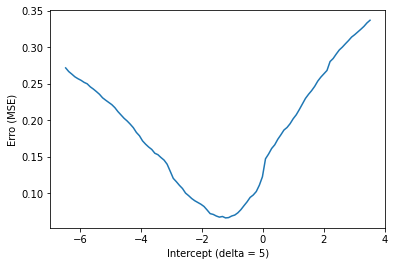

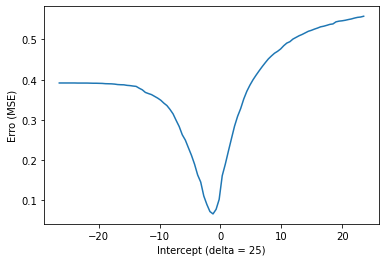

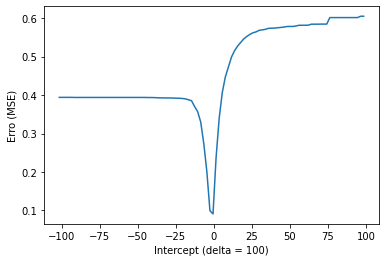

In [10]:
deltas = [5, 25, 100]

for _delta in deltas:
    errors, weights = calc_error(_delta)
    pyplot.ylabel("Erro (MSE)")
    pyplot.xlabel(f"Intercept (delta = {_delta})")
    pyplot.plot(weights, errors)
    pyplot.show()

## Plot MSE em relação à variação do atributo 'coef'

In [11]:
deltas = [
    1000, 350, 250, 350, 150, 150, 150, 125, 400, 250,
    125, 500, 350, 450, 150, 1000, 1500, 1500, 60, 1500,
    30, 500, 500, 500, 2000, 2000, 2000, 2000, 2000, 5000,
    2500, 2000, 2500, 2500, 3000, 3000, 3500, 700, 3500, 2500,
    4500, 4500, 1000, 4000, 3000, 2500, 9000, 7500, 25000, 6000,
    10000, 3000, 4000, 15000, 1000, 300, 75
]


def plot_coefficient_variation(coef_index: int):
    _errors = []
    _coefficient = model.coef_[0][coef_index]
    delta = deltas[coef_index]
    coefficient_values = numpy.linspace(_coefficient - delta, _coefficient + delta, 200)

    for value in coefficient_values:
        model.coef_[0][coef_index] = value
        y_predicted = model.predict(features)
        error = mean_squared_error(y, y_predicted)
        _errors.append(error)

    model.coef_[0][coef_index] = _coefficient
    pyplot.ylabel("Erro")
    pyplot.xlabel(f"coef[{coef_index}] | feature: {X.keys()[coef_index]}")
    pyplot.plot(coefficient_values, _errors)
    pyplot.show()

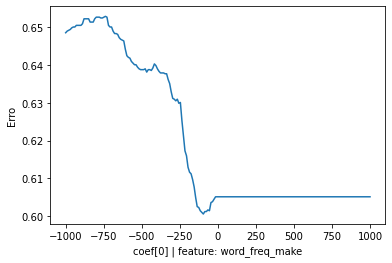

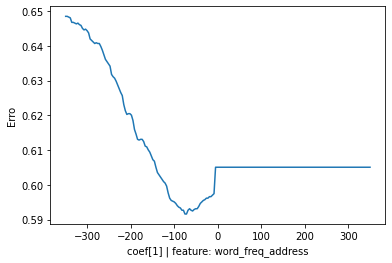

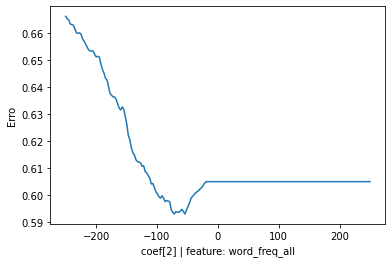

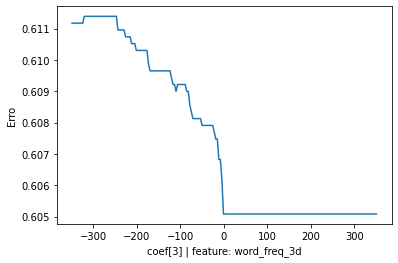

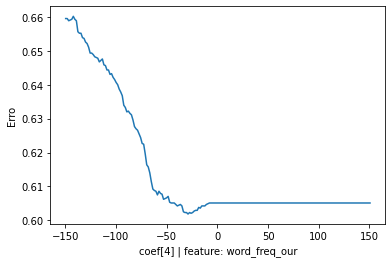

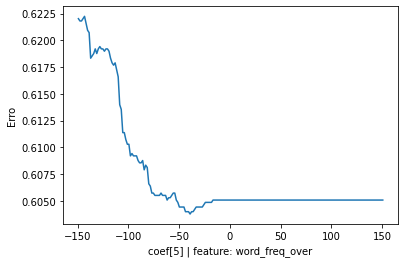

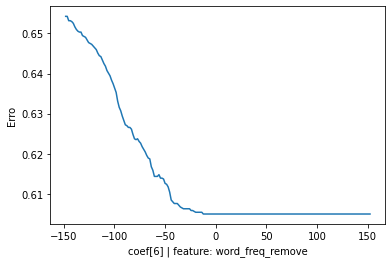

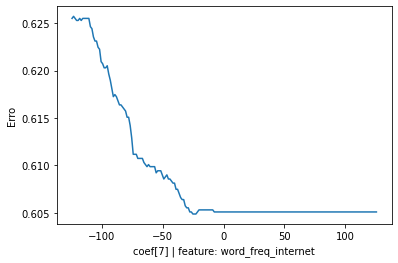

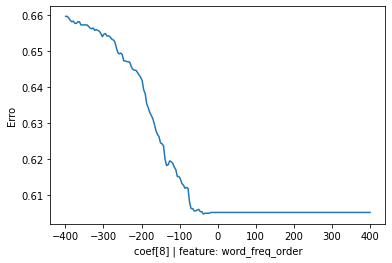

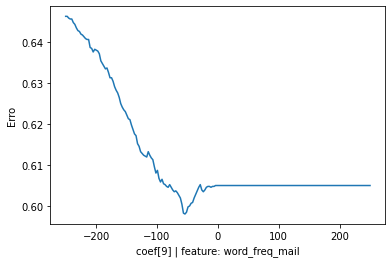

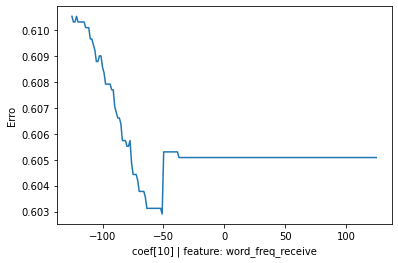

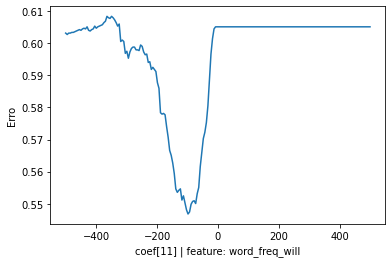

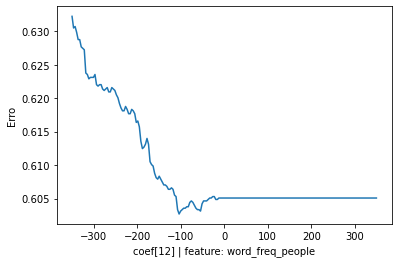

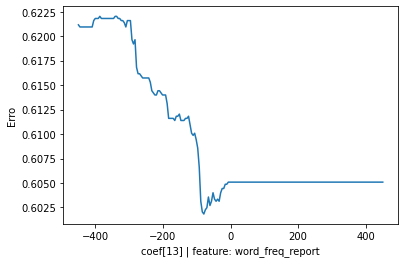

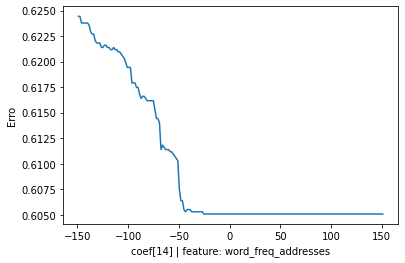

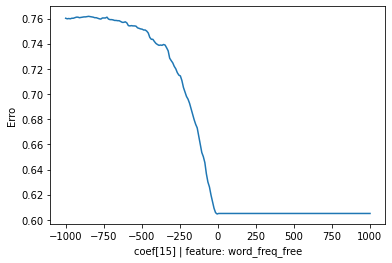

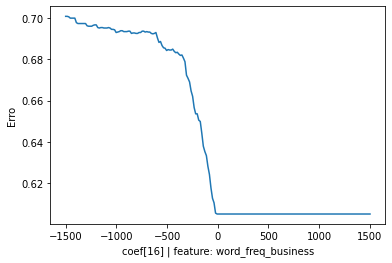

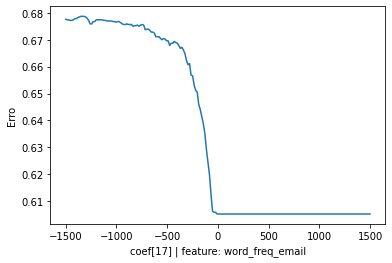

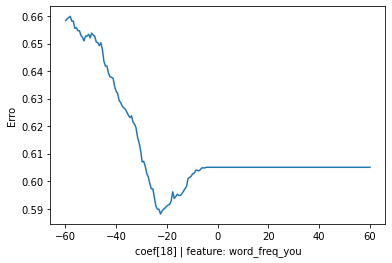

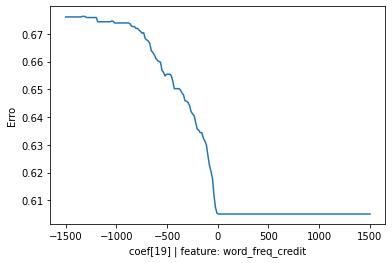

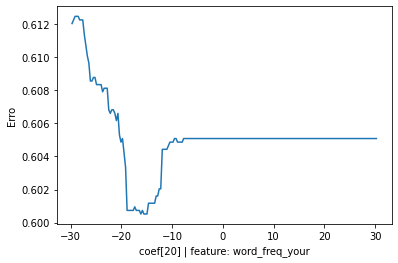

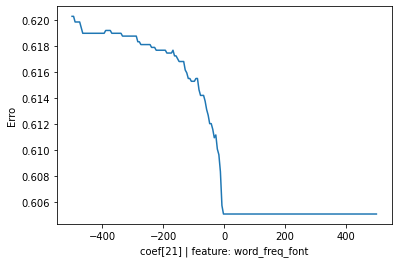

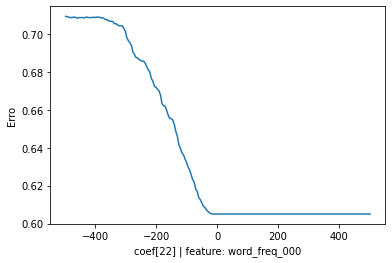

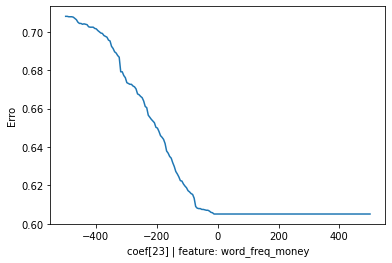

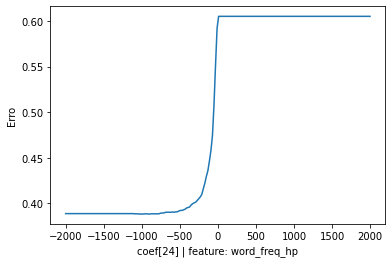

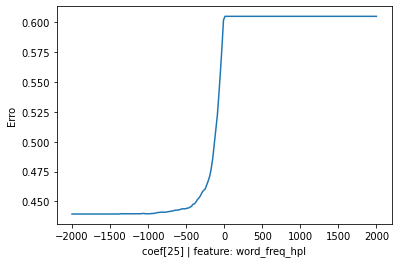

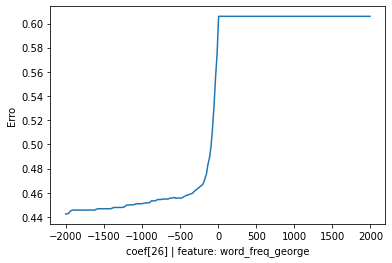

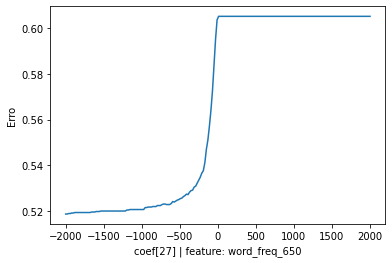

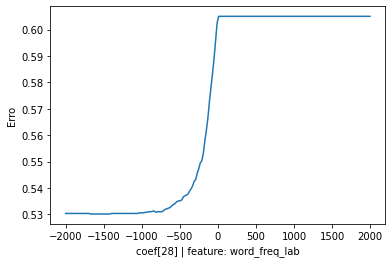

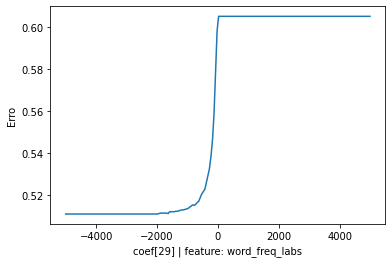

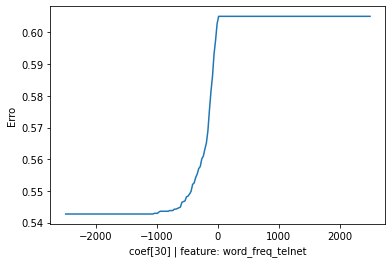

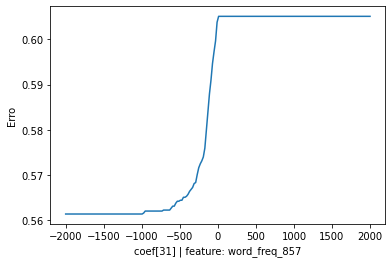

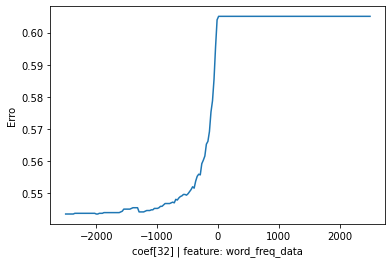

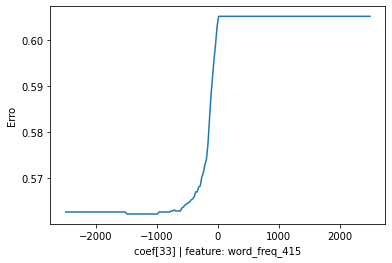

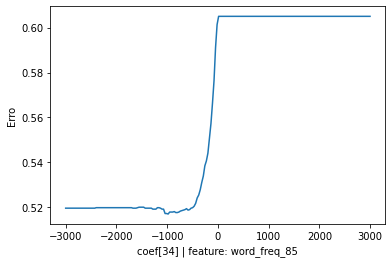

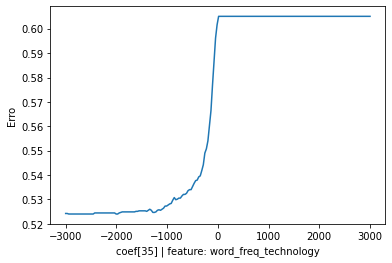

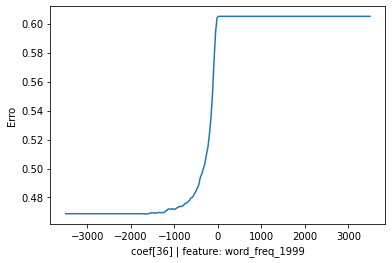

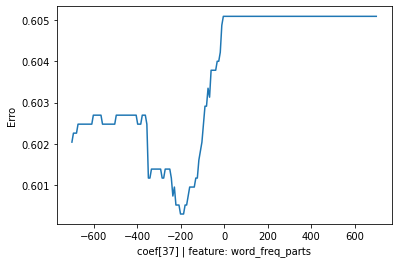

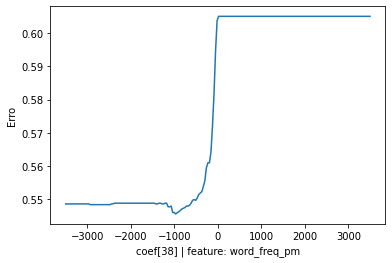

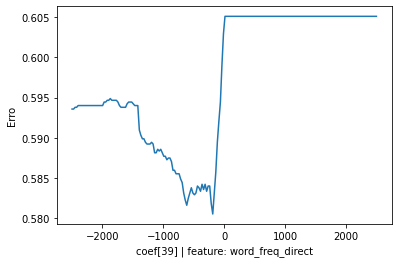

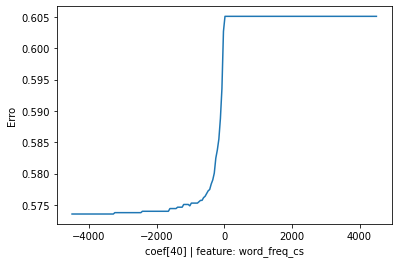

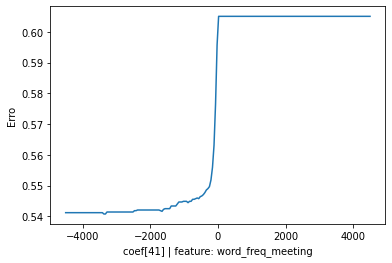

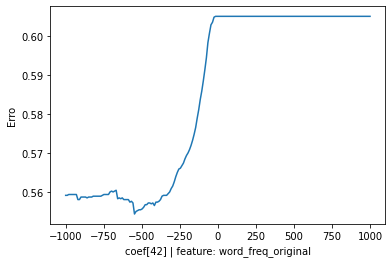

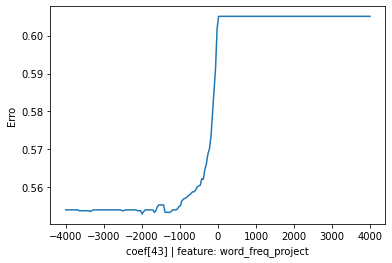

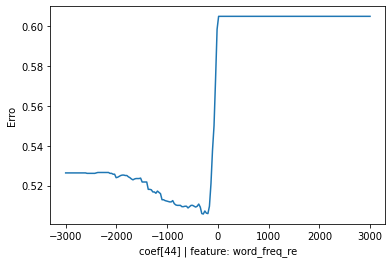

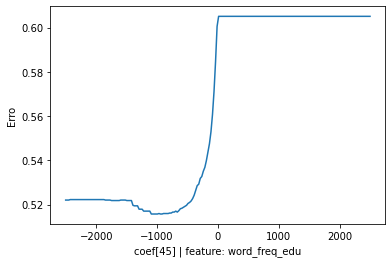

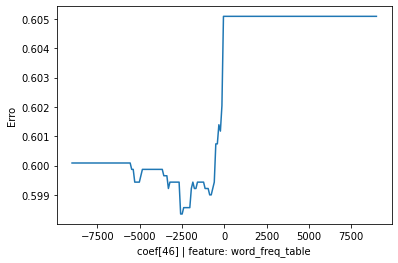

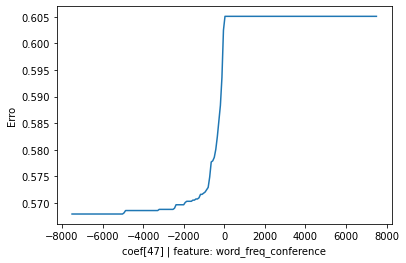

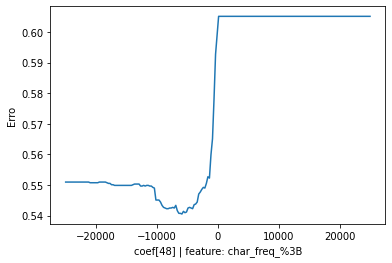

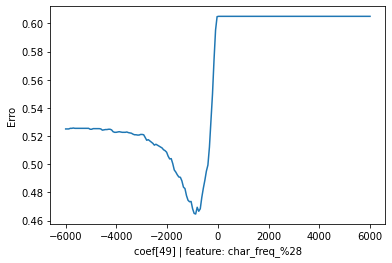

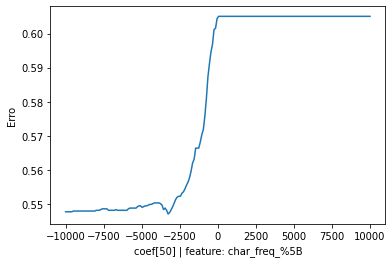

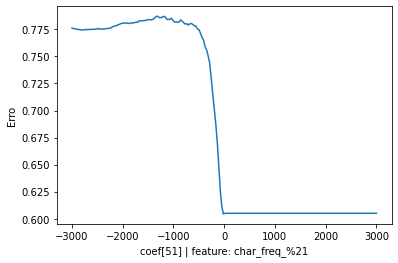

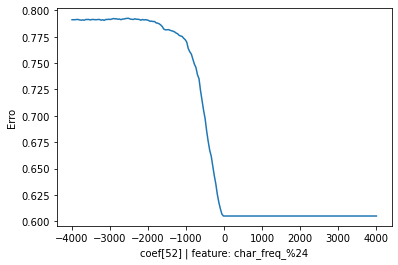

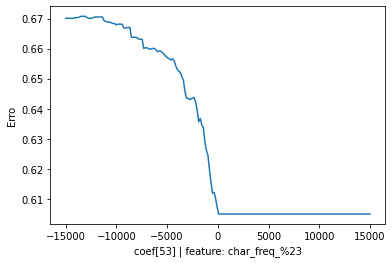

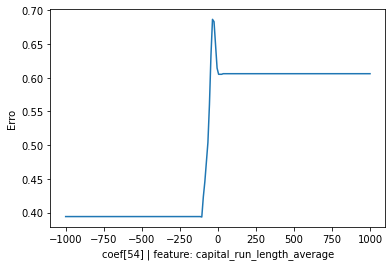

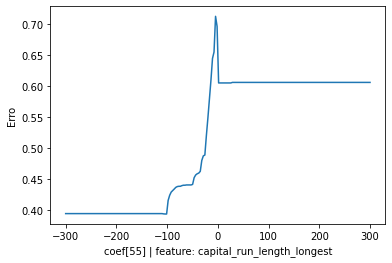

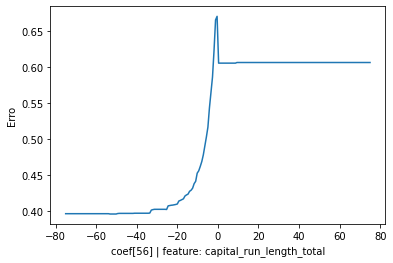

In [12]:
n_coefficients = len(model.coef_[0])

for index in range(n_coefficients):
    plot_coefficient_variation(index)